In [1]:
import pandas as pd
import numpy as numpy
import requests
import json
import numpy as np
from config import api_key
from pprint import pprint
import matplotlib.pyplot as plt
import csv
import datetime
#use variable for airport - may later make a "live demo" intro Method to pull different .json and call other code?
departureIataCode = "DFW"
arrivalIataCode = ""

In [2]:
Departure_url = f"http://aviation-edge.com/v2/public/timetable?key={api_key}&iataCode=DFW&type=departure"

In [3]:
# Performing a GET request similar to the one we executed
# earlier
data = requests.get(Departure_url).json()
#responseA = requests.get(Arrival_url)
pprint(data[0])

{'airline': {'iataCode': 'OZ', 'icaoCode': 'AAR', 'name': 'Asiana Airlines'},
 'arrival': {'actualRunway': None,
             'actualTime': None,
             'baggage': None,
             'delay': None,
             'estimatedRunway': None,
             'estimatedTime': None,
             'gate': None,
             'iataCode': 'SEA',
             'icaoCode': 'KSEA',
             'scheduledTime': '2020-08-15T07:15:00.000',
             'terminal': None},
 'codeshared': None,
 'departure': {'actualRunway': None,
               'actualTime': None,
               'baggage': None,
               'delay': None,
               'estimatedRunway': None,
               'estimatedTime': None,
               'gate': None,
               'iataCode': 'DFW',
               'icaoCode': 'KDFW',
               'scheduledTime': '2020-08-15T05:05:00.000',
               'terminal': None},
 'flight': {'iataNumber': 'OZ241', 'icaoNumber': 'AAR241', 'number': '241'},
 'status': 'active',
 'type': 'departure

In [24]:
#JB-added terminal to the list which will give us another lookup option
names= []
times= []
flights=[]
terminal= []
gate = []
status = []
length = int(len(data)-1)
#added news list to hold airportIataCodes
departureIataCodes = []
arrivalIataCodes = []

for x in range(0,length):
    names.append(data[x]["airline"]["name"])
    Time = data[x]["departure"]["scheduledTime"]
    TimeSplit = Time.split("T")[1]
    times.append(TimeSplit[:5])
    flights.append(data[x]["flight"]["iataNumber"])
    gate.append(data[x]["departure"]["gate"])
    terminal.append(data[x]["departure"]["terminal"])
    status.append(data[x]["status"])
    #added news list to hold airportIataCodes
    departureIataCodes.append(data[x]["departure"]["iataCode"])
    arrivalIataCodes.append(data[x]["arrival"]["iataCode"])

df = pd.DataFrame()
df["name"] =names
df["scheduled_Time"] =pd.to_datetime(times)
df["time"] = times
df["iata_Number"]=flights
df["terminal"]=terminal
df["gate"]=gate
df["status"]=status
#added news df columns to hold airportIataCodes
df["departure_Iata_Code"] = departureIataCodes
df["arrival_Iata_Code"] = arrivalIataCodes


#Creating new clean dataframe without cancelled and unknown status flights
#also filtering out large known shipping carriers 
cleanDeparture_df = df.loc[(df["status"] != "cancelled") &
    (df["status"] != "unknown") &
    (df["name"] != "FedEx") &
    (df["name"] != "UPS Airlines") &
    (df["name"] != "Martinaire") &
    (df["name"] != "Ameriflight") &
    (df["name"] != "Aviastar-TU") &
    (df["name"] != "Lufthansa Cargo"),:]
#this dataframe contains all of the passenger flights pulled from the API
cleanDeparture_df.head()

,name,scheduled_Time,time,iata_Number,terminal,gate,status,departure_Iata_Code,arrival_Iata_Code
2,Nordic Regional Airlines,2020-08-15 05:00:00,05:00,N77WF,None,None,scheduled,CRP,SAT
4,Southwest Airlines,2020-08-15 06:15:00,06:15,WN734,1,8,landed,DAL,SAT
5,Gryphon Airlines,2020-08-15 06:45:00,06:45,Y359MM,None,None,scheduled,MSY,SAT
6,Southwest Airlines,2020-08-15 08:30:00,08:30,WN619,None,20,landed,HOU,SAT
8,Jet Linx Aviation,2020-08-15 08:35:00,08:35,JL7272,C,C29,landed,DFW,SAT


In [40]:
# Playing around with time format
time_df = cleanDeparture_df["scheduled_Time"]
time_fixed = time_df.map(lambda x: x.strftime("%b %d %Y %I:%M %p"))
time_fixed.head()

2    Aug 15 2020 05:00 AM
4    Aug 15 2020 06:15 AM
5    Aug 15 2020 06:45 AM
6    Aug 15 2020 08:30 AM
8    Aug 15 2020 08:35 AM
Name: scheduled_Time, dtype: object

In [38]:
# Playing around with time
# '2020-08-13 06:00:00'
# Original code
# time_df = df["scheduled_Time"] =pd.to_datetime(times, format="%b %d %Y %I:%M %p")
# Match the code to time
# time_df = df["scheduled_Time"] =pd.to_datetime(times, format="%b %d %Y %I:%M %p")
# from datetime import datetime
# d = datetime.striptime("")
    
# import time
# t = time.strptime(time_df, "%H:%M")
# timevalue_12hour = time.strftime("%I:%M %p", t)
    
# t = time.strptime(time_df, "%H:%M")
# timevalue_12hour = time.strftime("%I:%M %p", t)
    
# date_time = time.strftime("%b %d %Y %-I:%M %p")
# date_time
time_df = cleanDeparture_df["scheduled_Time"]
time_fixed = time_df.map(lambda x: x.strftime("%b %d %Y %I:%M %p"))
time_fixed.head()

2    Aug 15 2020 05:00 AM
4    Aug 15 2020 06:15 AM
5    Aug 15 2020 06:45 AM
6    Aug 15 2020 08:30 AM
8    Aug 15 2020 08:35 AM
Name: scheduled_Time, dtype: object

In [37]:
test1 = cleanDeparture_df.groupby(["scheduled_Time"])["iata_Number"].count()# Convert to DataFrame
test1_df = test1.to_frame()
test1_df.head()

,iata_Number
scheduled_Time,
2020-08-15 05:00:00,1
2020-08-15 06:15:00,1
2020-08-15 06:45:00,1
2020-08-15 07:00:00,1
2020-08-15 08:25:00,1


Text(0.5, 1.0, 'Flight Volume for Today at DFW')

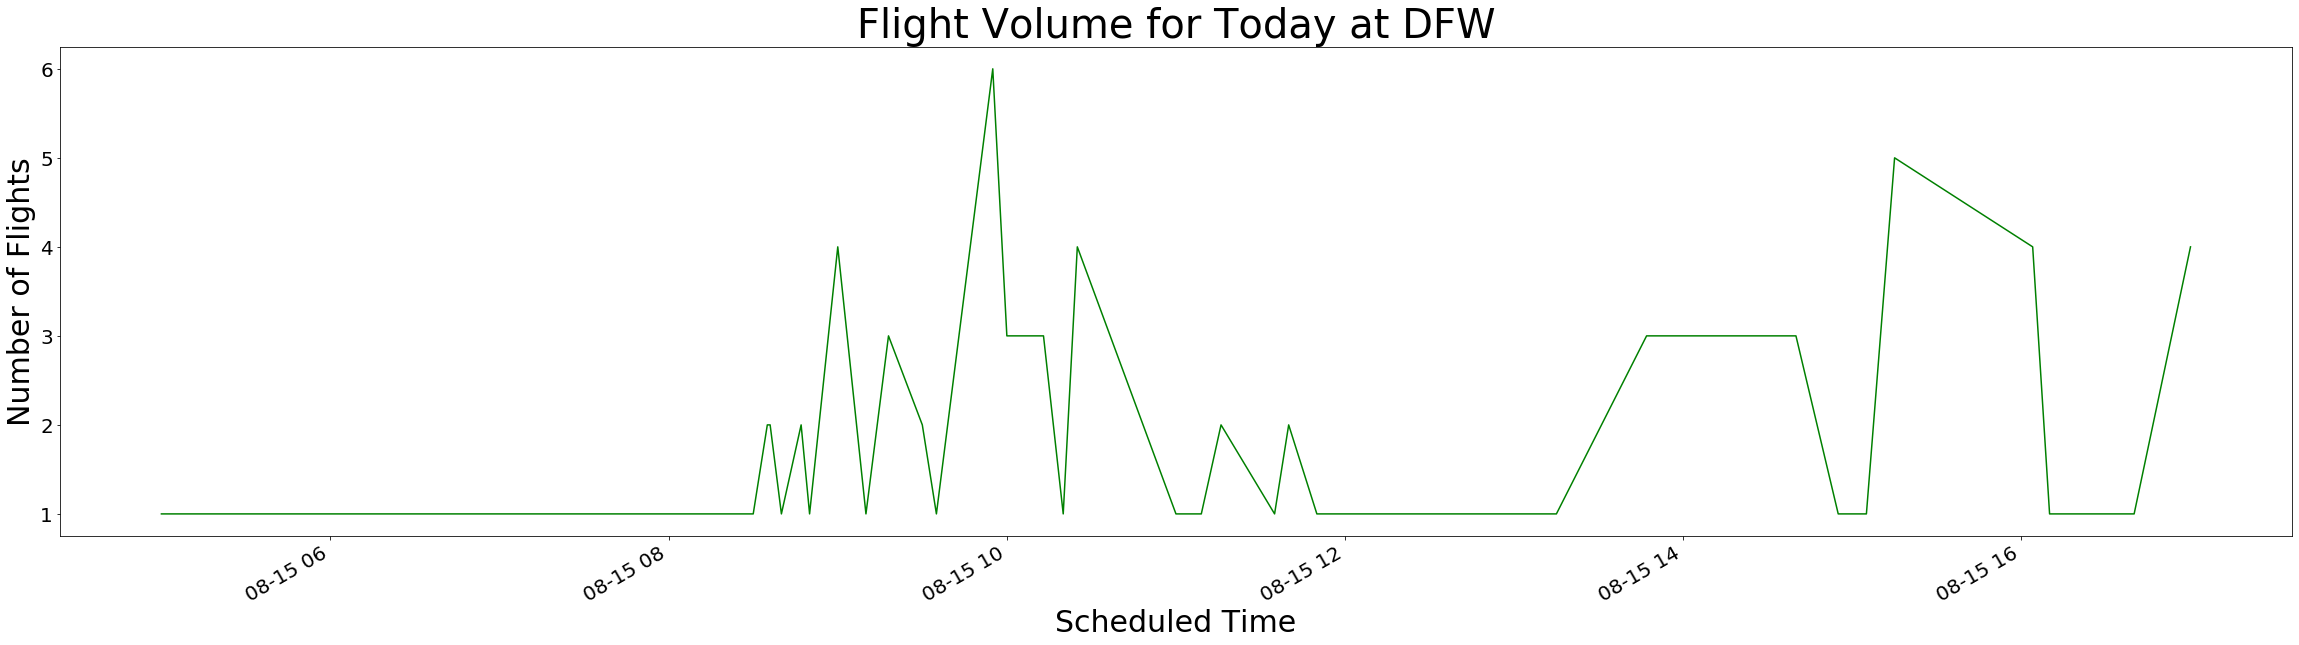

In [35]:
Chart_df = cleanDeparture_df.groupby(["scheduled_Time"])["iata_Number"].count()
Chart_df.plot(kind="line", color="green", title="Flight per Hour", fontsize=20, figsize = (40,10))
plt.xlabel("Scheduled Time", fontsize=30)
plt.ylabel("Number of Flights", fontsize=30)
plt.title(f"Flight Volume for Today at {departureIataCode}", fontsize=40)

(737652.2118055555, 737652.75)

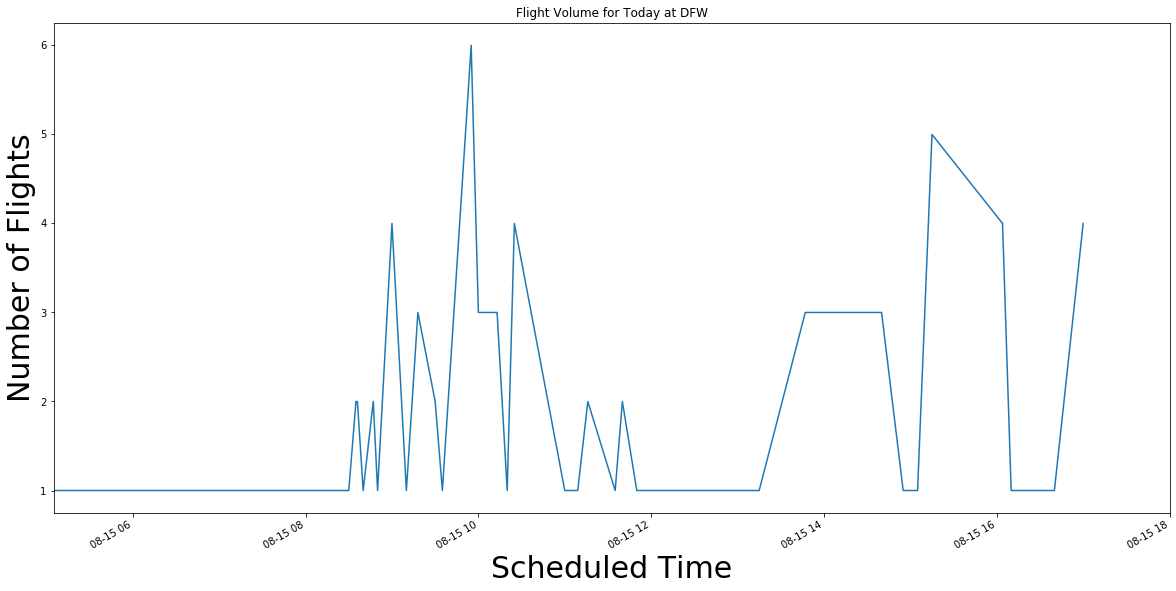

In [34]:
# Graph change with time
# This graph looks different from the original
Chart1_gb = cleanDeparture_df.groupby(["scheduled_Time"])["iata_Number"].count()
Chart1_gb.plot(kind="line", title=f"Flight Volume for Today at {departureIataCode}", figsize = (20,10))
plt.xlabel("Scheduled Time", fontsize=30)
plt.ylabel("Number of Flights", fontsize=30)
plt.xlim(Clean_df["time"].min(),Clean_df["time"].max())

In [43]:
#establish random sample of 1 to get data for testing
randomIataNumberSample_df = Clean_df.sample(1)
#pulls fields from sample to be used for easy comparison in following kernels
randomIataNumber = randomIataNumberSample_df.iloc[0]
randomScheduledTime = randomIataNumberSample_df.iloc[0,1]
randomTerminalNumber = randomIataNumberSample_df.iloc[0,4]
randomGateNumber = randomIataNumberSample_df.iloc[0,5]
randomIataCode = randomIataNumberSample_df.iloc[0,8]
# randomIataCode = randomIataNumberSample.loc["arrival_Iata_Code"]
# randomIataCode
#randomIataNumber = randomIataNumberSample.loc["arrival_Iata_Code"]
Arrival_url = f"http://aviation-edge.com/v2/public/timetable?key={api_key}&&iataCode={randomIataCode}&type=arrival"
print(Arrival_url)
randomIataNumberSample_df

http://aviation-edge.com/v2/public/timetable?key=72f61d-5769d8&&iataCode=TYR&type=arrival


,name,scheduled_Time,time,iata_Number,terminal,gate,status,departure_Iata_Code,arrival_Iata_Code
470,American Airlines,2020-08-15 13:00:00,13:00,AA3674,E,E24,scheduled,DFW,TYR


2020-08-15 13:00:00


(737652.2118055555, 737652.75)

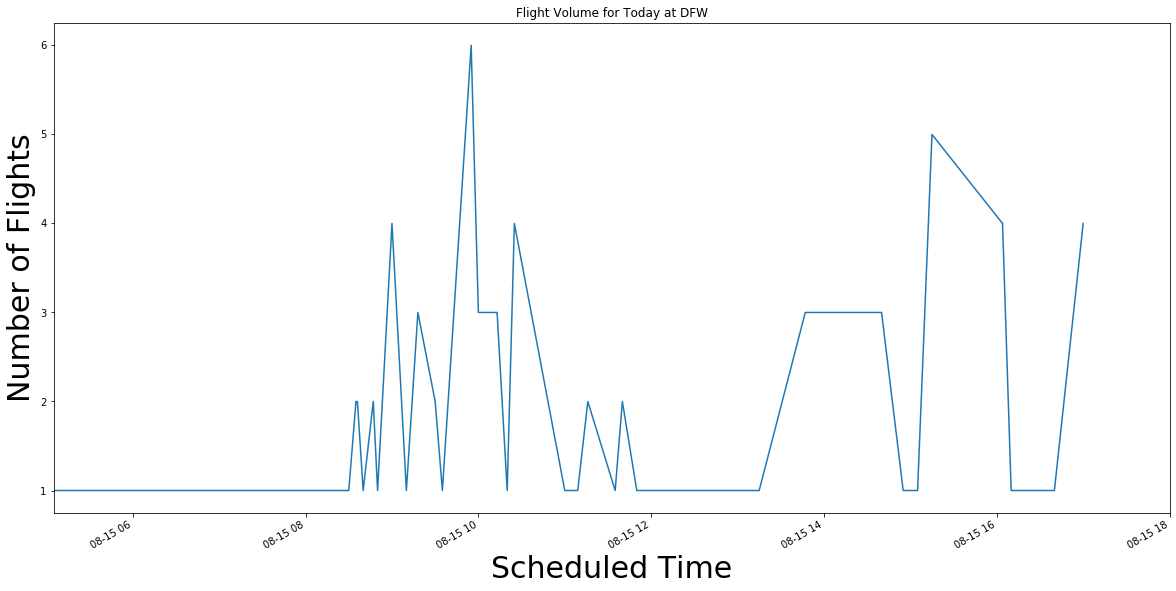

In [45]:
# 3 hours prior to arrival chart
Chart3_gb = cleanDeparture_df.groupby(["scheduled_Time"])["iata_Number"].count()
Chart3_gb.plot(kind="line", title=f"Flight Volume for Today at {departureIataCode}", figsize = (20,10))
plt.xlabel("Scheduled Time", fontsize=30)
plt.ylabel("Number of Flights", fontsize=30)
threeHoursPriorTime = randomScheduledTime
print(threeHoursPriorTime)
plt.xlim(Clean_df["time"].min(),Clean_df["time"].max())

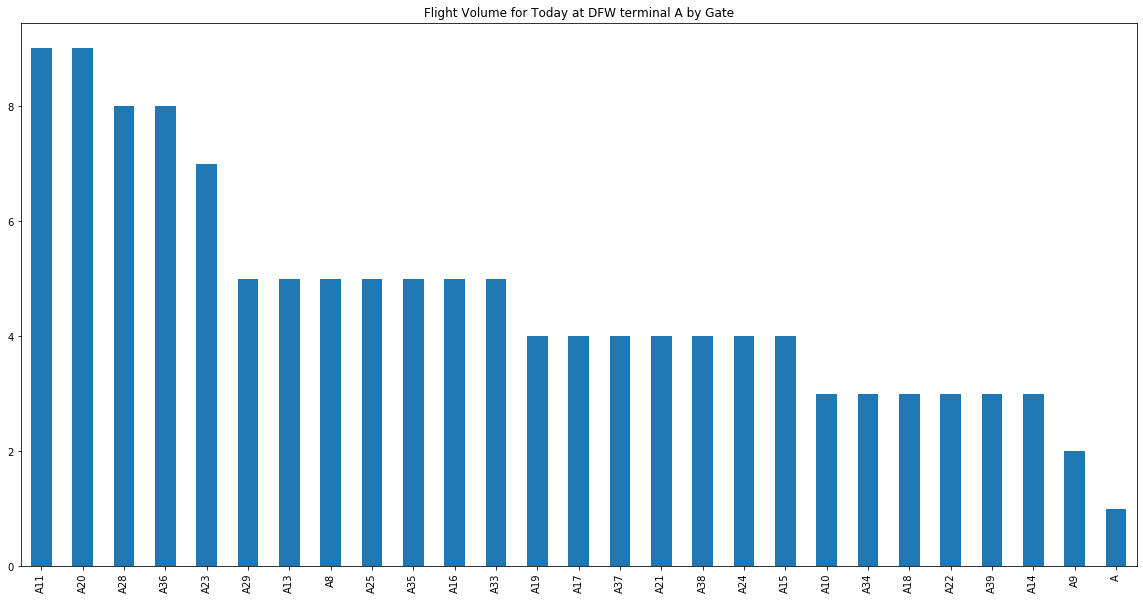

In [19]:
#code to pull and chart only information from the terminal from the random sample dataframe
gateDensity_df = Clean_df.loc[Clean_df["terminal"] == randomTerminalNumber]
gateDensityChart_df = gateDensity_df.gate.value_counts()
gateDensityChart_df.plot(kind="bar",title=f"Flight Volume for Today at {departureIataCode} terminal {randomTerminalNumber} by Gate", figsize = (20,10))

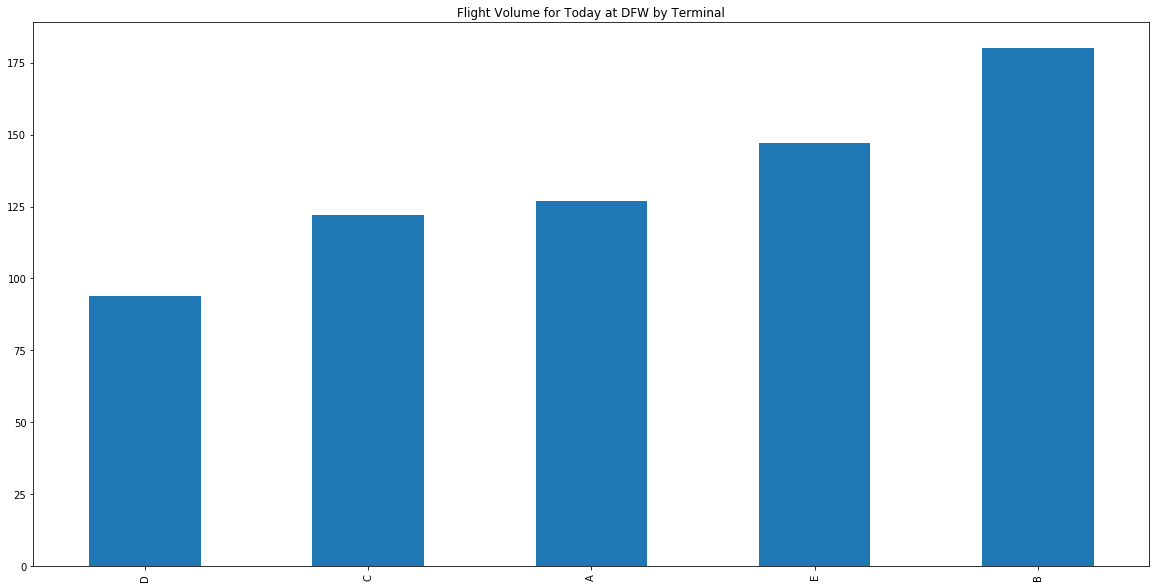

In [12]:
#code to pull and chart TERMINAL DENSITY
terminalDensityChart_df = Clean_df.terminal.value_counts().sort_values()
terminalDensityChart_df.plot(kind="bar",title=f"Flight Volume for Today at {departureIataCode} by Terminal", figsize = (20,10))

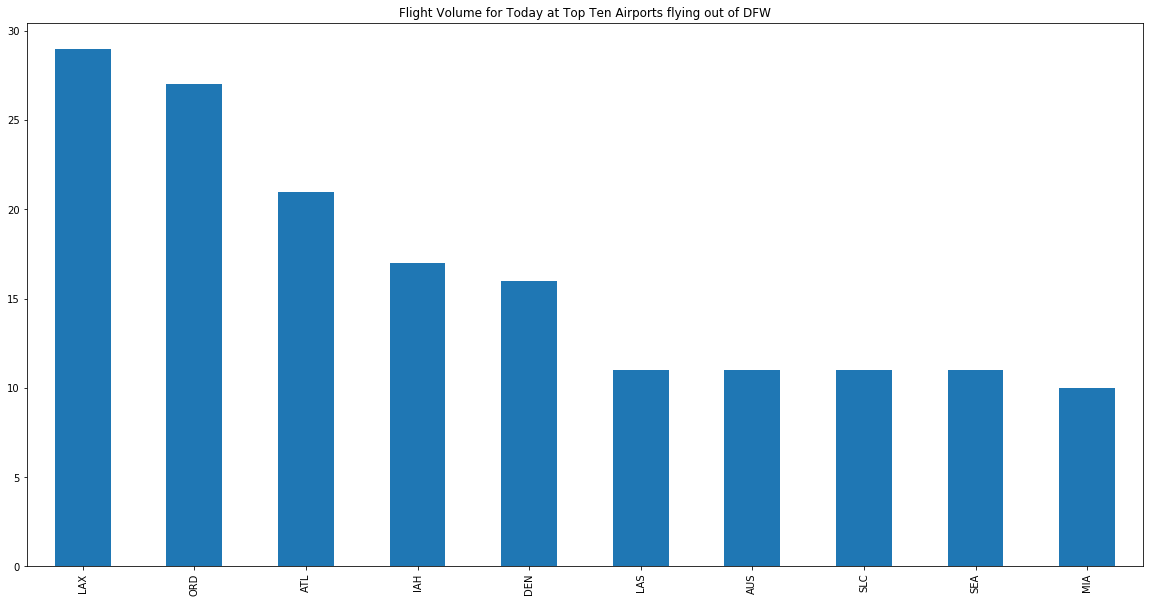

In [13]:
#code to pull and chart MOST POPULAR DESTINATIONS FROM DFW TODAY - use for top 10
topTenChart_df = Clean_df.arrival_Iata_Code.value_counts().sort_values(ascending=False).head(10)
topTenChart_df.plot(kind="bar",title=f"Flight Volume for Today at Top Ten Airports flying out of {departureIataCode}", figsize = (20,10))

In [20]:
# Performing a GET request similar to the one we executed
# earlier
data = requests.get(Arrival_url).json()
#responseA = requests.get(Arrival_url)
pprint(data[0])

{'airline': {'iataCode': 'FX', 'icaoCode': 'FDX', 'name': 'FedEx'},
 'arrival': {'actualRunway': None,
             'actualTime': None,
             'baggage': None,
             'delay': None,
             'estimatedRunway': None,
             'estimatedTime': None,
             'gate': None,
             'iataCode': 'SAT',
             'icaoCode': 'KSAT',
             'scheduledTime': '2020-08-15T04:55:00.000',
             'terminal': 'S'},
 'codeshared': None,
 'departure': {'actualRunway': None,
               'actualTime': None,
               'baggage': None,
               'delay': '16',
               'estimatedRunway': None,
               'estimatedTime': '2020-08-15T03:34:00.000',
               'gate': None,
               'iataCode': 'MEM',
               'icaoCode': 'KMEM',
               'scheduledTime': '2020-08-15T03:18:00.000',
               'terminal': None},
 'flight': {'iataNumber': 'FX1416', 'icaoNumber': 'FDX1416', 'number': '1416'},
 'status': 'scheduled',
 't

In [23]:
#JB-added terminal to the list which will give us another lookup option
names= []
times= []
flights=[]
terminal= []
gate = []
status = []
length = int(len(data)-1)
#added news list to hold airportIataCodes
departureIataCodes = []
arrivalIataCodes = []

for x in range(0,length):
    names.append(data[x]["airline"]["name"])
    Time = data[x]["arrival"]["scheduledTime"]
    TimeSplit = Time.split("T")[1]
    times.append(TimeSplit[:5])
    flights.append(data[x]["flight"]["iataNumber"])
    gate.append(data[x]["arrival"]["gate"])
    terminal.append(data[x]["arrival"]["terminal"])
    status.append(data[x]["status"])
    #added news list to hold airportIataCodes
    departureIataCodes.append(data[x]["departure"]["iataCode"])
    arrivalIataCodes.append(data[x]["arrival"]["iataCode"])

df = pd.DataFrame()
df["name"] =names
df["scheduled_Time"] =pd.to_datetime(times)
df["time"] = times
df["iata_Number"]=flights
df["terminal"]=terminal
df["gate"]=gate
df["status"]=status
#added news df columns to hold airportIataCodes
df["departure_Iata_Code"] = departureIataCodes
df["arrival_Iata_Code"] = arrivalIataCodes


#Creating new clean dataframe without cancelled and unknown status flights
#also filtering out large known shipping carriers 
cleanArrival_df = df.loc[(df["status"] != "cancelled") &
    (df["status"] != "unknown") &
    (df["name"] != "FedEx") &
    (df["name"] != "UPS Airlines") &
    (df["name"] != "Martinaire") &
    (df["name"] != "Ameriflight") &
    (df["name"] != "Aviastar-TU") &
    (df["name"] != "Lufthansa Cargo"),:]
#this dataframe contains all of the passenger flights pulled from the API
cleanArrival_df.head()

,name,scheduled_Time,time,iata_Number,terminal,gate,status,departure_Iata_Code,arrival_Iata_Code
2,Nordic Regional Airlines,2020-08-15 05:48:00,05:48,N77WF,S,None,scheduled,CRP,SAT
4,Southwest Airlines,2020-08-15 07:20:00,07:20,WN734,A,A10,landed,DAL,SAT
5,Gryphon Airlines,2020-08-15 08:10:00,08:10,Y359MM,A,None,scheduled,MSY,SAT
6,Southwest Airlines,2020-08-15 09:30:00,09:30,WN619,A,A13,landed,HOU,SAT
8,Jet Linx Aviation,2020-08-15 09:38:00,09:38,JL7272,B,B2,landed,DFW,SAT


Text(0.5, 1.0, 'Flight Volume for Today at SAT')

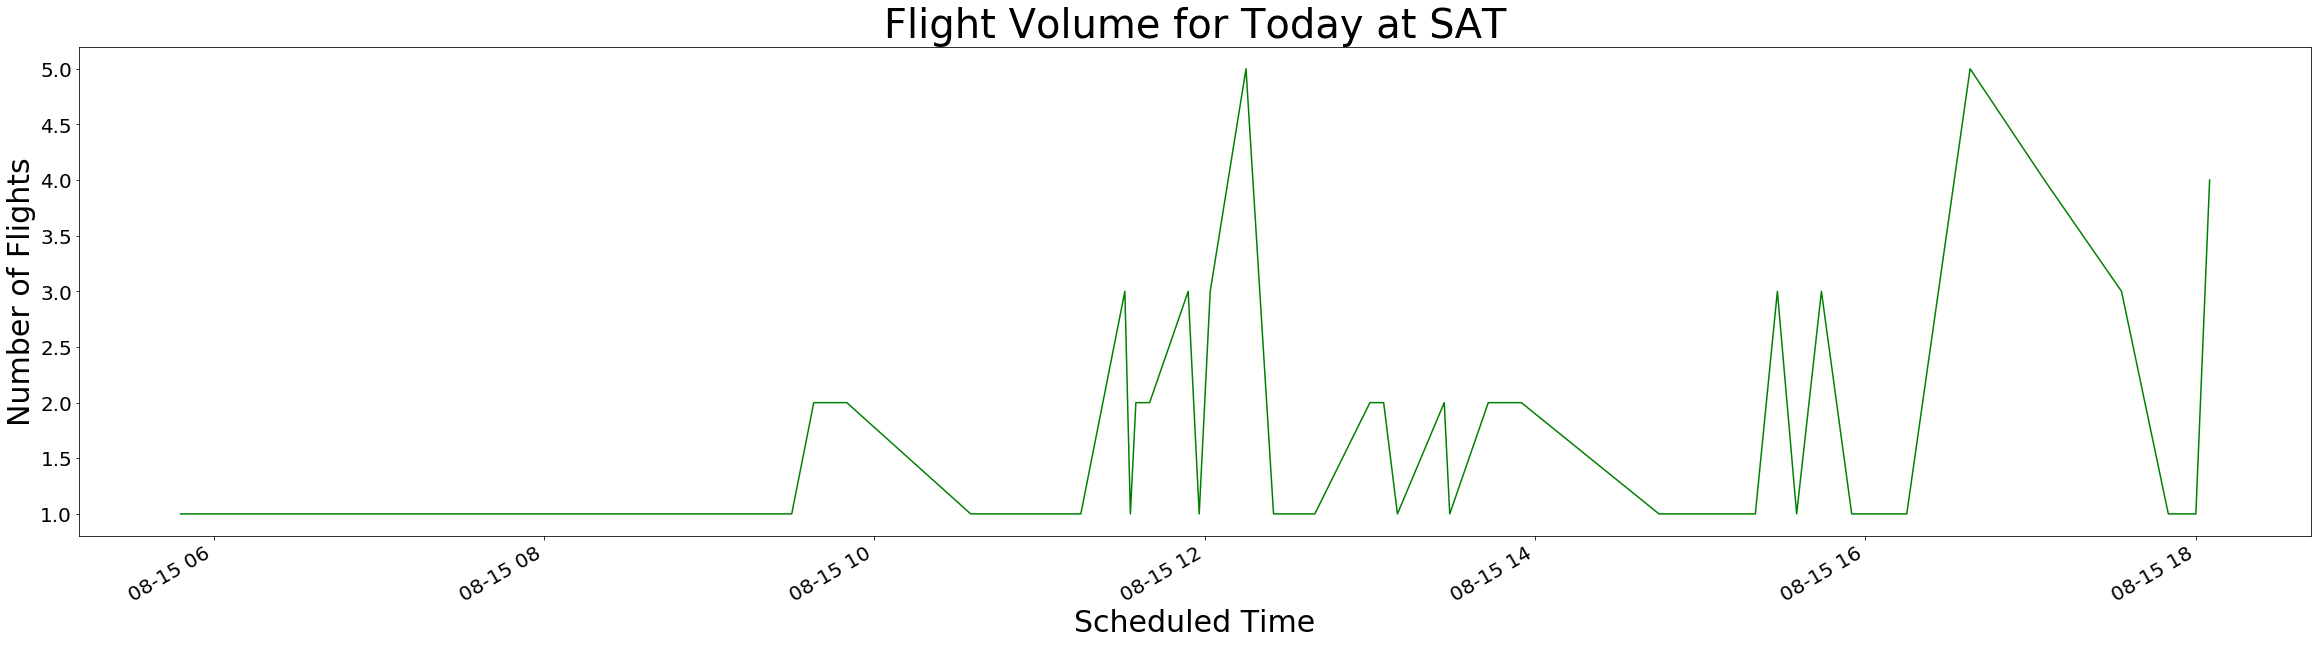

In [27]:
arrivalIataCode = cleanArrival_df.iloc[0,8]
arrivalChart_df = cleanArrival_df.groupby(["scheduled_Time"])["iata_Number"].count()
arrivalChart_df.plot(kind="line", color="green", title="Flight per Hour", fontsize=20, figsize = (40,10))
plt.xlabel("Scheduled Time", fontsize=30)
plt.ylabel("Number of Flights", fontsize=30)
plt.title(f"Flight Volume for Today at {arrivalIataCode}", fontsize=40)

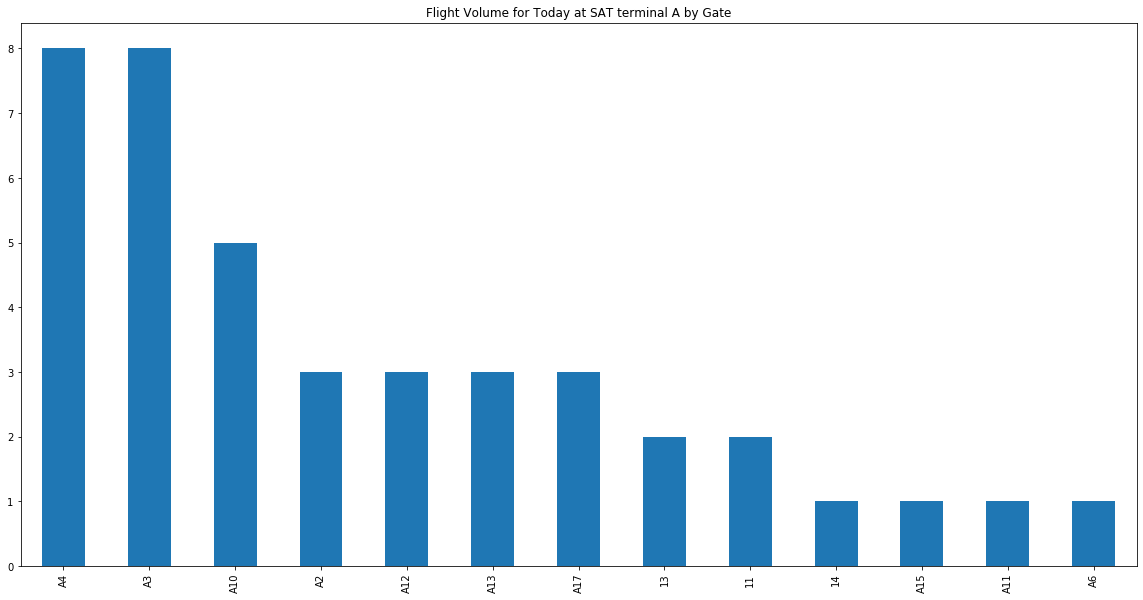

In [30]:
#code to pull and chart only information from the terminal from the random sample dataframe
gateDensity_df = cleanArrival_df.loc[cleanArrival_df["terminal"] == randomTerminalNumber]
gateDensityChart_df = gateDensity_df.gate.value_counts()
gateDensityChart_df.plot(kind="bar",title=f"Flight Volume for Today at {arrivalIataCode} terminal {randomTerminalNumber} by Gate", figsize = (20,10))

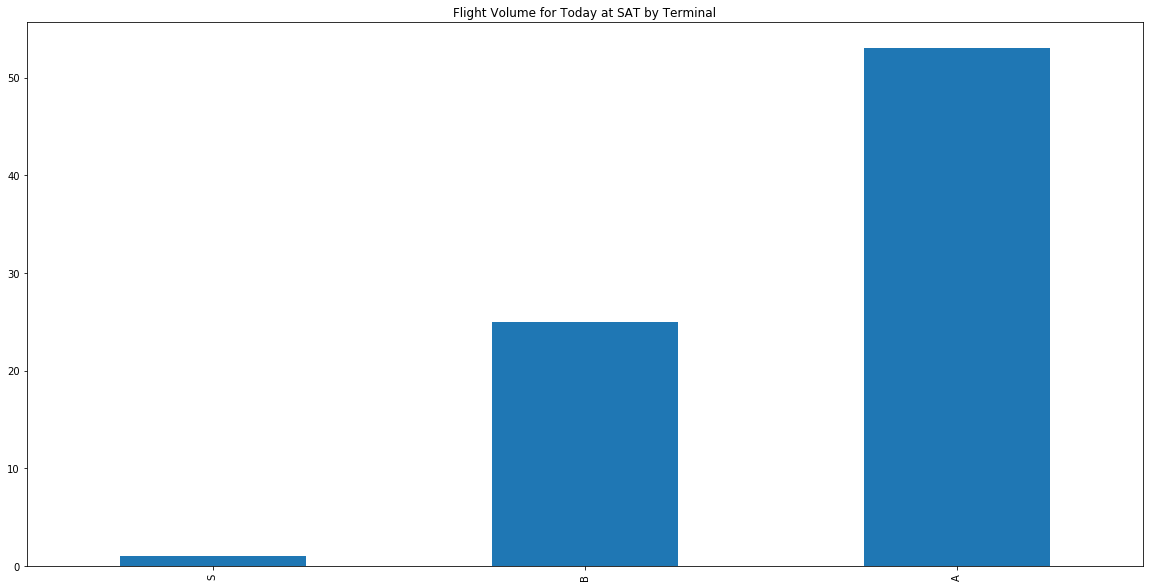

In [31]:
#code to pull and chart TERMINAL DENSITY
terminalDensityChart_df = cleanArrival_df.terminal.value_counts().sort_values()
terminalDensityChart_df.plot(kind="bar",title=f"Flight Volume for Today at {arrivalIataCode} by Terminal", figsize = (20,10))

In [14]:
#START OF OLD STUFF

#df["Time"] = datetime.strptime(df["scheduledTime"],"%H-%M")
#for index, row in df.iterrows():
        #row["Time"] = row["scheduledTime"].strftime('%H:%M:%S'))

#df.to_csv("airport_data.csv", encoding="utf-8", index=False, header=True)
test = df.groupby(["Time"])["iataNumber"].count()

#test.plot(kind="line", title="Flight per Hour", figsize = (20,10))


#fig, ax = plt.subplots(figsize=(20, 10))
xMin = f"{today} 05:00:00"
xMax = f"{today} 20:00:00"
# plt.xlim(xMin,xMax)
plt.plot_date(df["Time"].unique(),test, linestyle = "-")
#plt.plot(df["Time"].unique(),test, linestyle = "-")
#ax.set_xticklabels(["8am","10am","12pm","2pm","4pm","6pm","8pm"])
#plt.show()

# import scipy.interpolate
# x = datetime.datetime(df["scheduledTime"].unique()).timestamp()
# y = test
# print(x.dtype)
# f2 = interp1d(x, y, kind='cubic')
# import matplotlib.pyplot as plt
# plt.plot(x, y, 'o')#, xnew, f2(xnew), '--')



# plt.xlabel=["6am","8am","10am","noon","2pm","4pm","6pm","8pm"]

#df.to_csv("airport_data.csv", encoding="utf-8", index=False, header=True)
test = df.groupby(["scheduledTime"])["iataNumber"].count()
test.plot(kind="line", color="green", title="Flight per Hour", fontsize=20, figsize = (40,10))
plt.xlabel("Schedule Time", fontsize=30)
plt.ylabel("Number of Flights", fontsize=30)
plt.title("Flight per Hour", fontsize=40)
plt.xlim("2020-08-13 12:00:00","2020-08-13 23:20:00")

# x_axis = np.arange(test_df)
# tick_locations = [value for value in x_axis]
# xticks=["midnight","3am","6am","9am","noon","3pm","6pm","9pm","midnight"]
# plt.xticks(tick_locations, test_df["scheduledTime"])

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# count the number of flights for each 5 min time period
df_flights = df.groupby(['scheduledTime'])
df_flt_counts = df_flights['iataNumber'].count()
df["Time"].dtype

SyntaxError: invalid syntax (<ipython-input-14-bebc7920eb16>, line 47)

In [15]:
#JB-reducing the time intrevals to make graphing easier
interval_range = pd.interval_range(start=600, freq=40, end=2300)
df['Times_group'] = pd.cut(df['scheduledTime'], bins=interval_range)
df.head()

KeyError: 'scheduledTime'

In [16]:
#JB- count the number of flights for each 20 min time period
df_flt_groups = df.groupby(['Times_group'])
df_group_count = df_flt_groups['iataNumber'].count()
#df_group_count.to_csv("groupedtimes.csv", encoding="utf-8", index=False, header=True)
df_group_count

KeyError: 'Times_group'

In [17]:
f, ax = plt.subplots(figsize=(25,10))
df_flt_counts.plot(kind="line", title="Flight per Hour")

plt.xlabel("Scheduled Time")
plt.ylabel("Number of Departures")
# xTicksList = [600,630,700,730,800,830,900,930,1000,1030,1100,1200,1230,,1300,1330,1400,1430,1500,1530,1600,1630,1700,1730,1800,1830,1900,1930,2000,2030,2100,2130,2200,2230,2300,2330,2400]
# xTicksLabels =["600","630","700","730","800","830","900","930","1000","1030","1100","1200","1230",,"1300","1330","1400","1430","1500","1530","1600","1630","1700","1730","1800","1830","1900","1930","2000","2030","2100","2130","2200","2230","2300","2330","2400"]
# plt.xticks=(xTicksList,xTickLabels)


NameError: name 'df_flt_counts' is not defined

In [18]:
f, ax = plt.subplots(figsize=(35,10))
df_flt_counts.plot(kind="bar", title="Flight per Hour")

plt.xlabel("Scheduled Time")
plt.ylabel("Number of Departures")
ylabel
ylabel


NameError: name 'df_flt_counts' is not defined